<a href="https://colab.research.google.com/github/Nisarg619/Machile-Learning/blob/main/Practical_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Metrics:
Accuracy: 0.8130774697938877
Precision: 0.7088607594936709
Recall: 0.5670886075949367
F1 Score: 0.630098452883263
ROC-AUC: 0.858855756241557


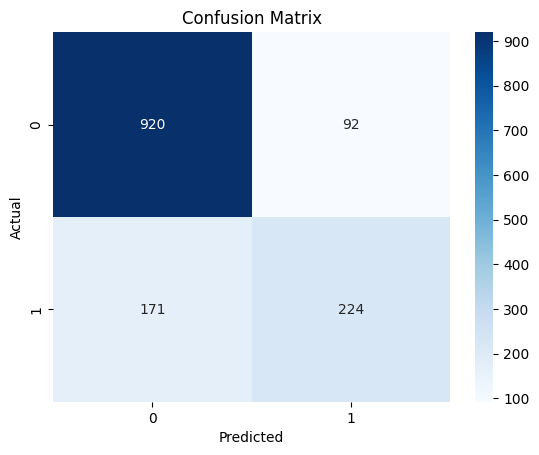

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, precision_recall_curve, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = "/content/Telco_customer_churn.csv"  # Adjust if running locally
df = pd.read_csv(file_path)

# Step 2: Data Preprocessing

# Convert 'Total Charges' to numeric (some values might be empty spaces)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop unnecessary columns
drop_cols = ['CustomerID', 'Lat Long', 'Churn Label', 'Churn Score', 'Churn Reason']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
df['Churn Value'] = label_enc.fit_transform(df['Churn Value'])  # 1 = Yes, 0 = No

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Step 3: Select Features and Target
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Step 5: Evaluate the Model
print("\nClassification Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

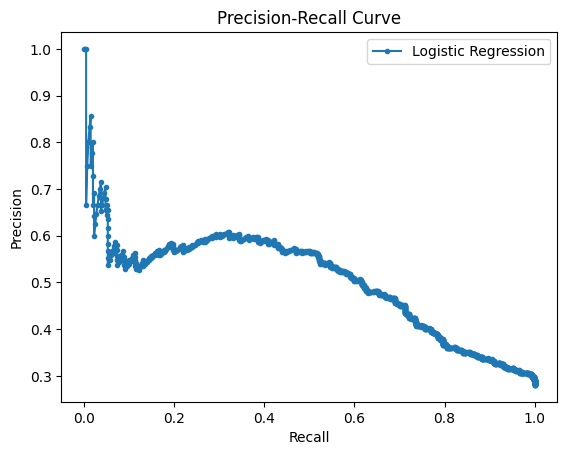

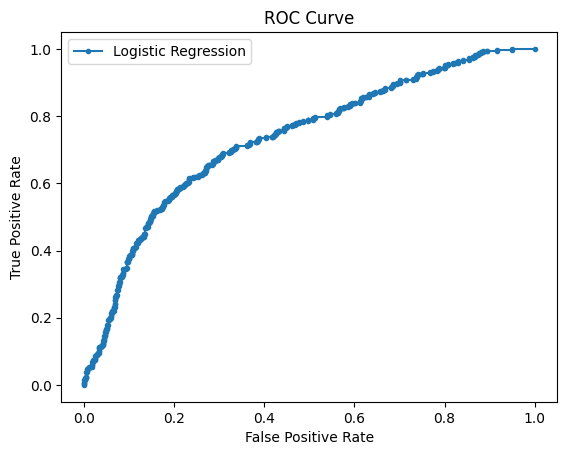

In [3]:
# Bonus Practical
# Step 6 (Bonus): Feature Scaling and Model Training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on Scaled Data
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)

# Predictions
y_proba_scaled = model_scaled.predict_proba(X_test_scaled)[:, 1]

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_scaled)
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_scaled)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
